# Using Python for Data Science: Network Analysis

This webinar explores how to use Python for dealing specifically with networks. It is designed as an introduction to network analysis using Python and Game of Thrones data. 

This webinar uses the NetworkX, Pandas and Matplotlib Python packages. This is not strictly an interactive webinar, but if you would like to run the code and receive outputs on your computer as I go through it, you should have [Anaconda for Python 3.5](https://www.continuum.io/downloads) downloaded and be comfortable using Jupyter Notebook ([Josiah Davis’ previous webinar](https://nbviewer.jupyter.org/github/josiahdavis/using_python_data_science/blob/master/Using%20Python%20for%20Data%20Science%20Webinar.ipynb) covers this).

Agenda

* What is network analysis? (Hint: It is just like any other data analysis!)
* How do I visualize a network in Python? 
* Who is the main character of Game of Thrones? A simple network analysis exercise

About the Instructor

![pass](https://my.slalom.com/User%20Photos/Profile%20Pictures/ben_gillman_LThumb.jpg?t=63594426366)

Ben Gillman works as a data science consultant in New York City. Ben's professional experience spans Machine Learning, Natural Language Processing, General Linear Modeling, Forecasting, and Data Visualization. Previously, Ben was a data scientist at J.Crew where his algorithms are used for things like sending the J.Crew catalog. He graduated from the George Washington University with a Bachelor's degree in Economics.

# 0) Navigating Jupyter Notebook
There are many tools for developing python scripts. For this webinar, we will be executing everything using the Jupyter notebook. For those of you who are new to the Jupyter project, here are some items that you should know about it. 

(This is a quick recap of what Josiah covered in the [last webinar](https://nbviewer.jupyter.org/github/josiahdavis/using_python_data_science/blob/master/Using%20Python%20for%20Data%20Science%20Webinar.ipynb))

**Item #0: Jupyter notebooks are a great way to develop and share code**

Here is the definition from the [Jupyter project website](http://jupyter.org/).

> The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more.

**Item #1: Jupyter notebooks are organized into cells, which can contain markdown or code.
This is a cell with markdown**

In [1]:
# This is a cell with code
def simple_calculator(first_number, second_number):
    return first_number + second_number
simple_calculator(5, 6)

11

**Item #3: There are many useful keyboard shortcuts which are commonly used**

Here are some shortcuts I use a lot. To get the full list go to Help -> Keyboard Shortcuts.

|          | Mac    | PC    |
|:----------|:--------|:-------|
| **Command Mode**  | esc    |   esc    |
| Delete   | d, d     |  d, d     |
| Markdown   | m     |  m     |
| Run Cell and move to next cell   | shift, return    | shift, enter     |
| Run Cell and Insert Below   | option, return    |   alt, enter    |
| Insert Above   | a    |    a   |
| Insert Below   | b    |    b   |
| **Edit Mode**     | return | enter |
| Run Cell and move to next cell | shift, return     |   shift, enter    |
| Run Cell and Insert Below   | option, return    |    alt, enter   |

# 1) What is Network Analysis?
A quick Google search will tell you network analysis is "the mathematical analysis of complex working procedures in terms of a network of related activities."

In simpler terms, network analysis is the analysis of data that represents a group of connected data points. It is different then typical tabular data analysis because data points are explicitly connected to each other. 

For easier research via Google: Network analysis is under the academic umbrella of [Graph Theory](https://en.wikipedia.org/wiki/Graph_theory), the study of graphical data. Network Analysis can also be called Network Science and Graph Analysis.

## Quick Glossary:
* **Network** (aka Graph): Set of objects where at least one of the objects have a connective relationship with another
* **Node** (aka vertice): Singular point in the network. A node can represent any entity that has relationship to others.
* **Edge** (aka link): Connection between two nodes in a network
* **Directed Edge**: Connection where information flows from one node to another
* **Un-Directed Edge**: Connection where information flows bilaterally between two nodes
* **Edge Weight**: A value for each edge denoting a numerical value associated with the relationship between nodes 
* **Clique**: Group of nodes where each node is connected to every other node
* **Attributes**: Data points associated with nodes or edges

![no-text](http://image.slidesharecdn.com/networkanalysislecture-150320110618-conversion-gate01/95/network-analysis-lecture-9-638.jpg?cb=1426867653)

*Typically networks are either considered un-directed or directed; they either consist of only directed edges or only undirected edges

# 2) What can be done with Network Analysis?
There are many areas of network analysis. Here are some major areas: 

**Centrality** - Finding the most important nodes in a network; the most centrally located

**Clustering** - Grouping nodes together

**Clique Structure** - Finding groups of nodes based strictly on cycles of edges

**Connectivity** - Given edge connections, calculating how well connected nodes are in the network

**Distance** - Calculating how far nodes are from others and get an idea of how large your network is

**Probabilistic Analysis** - Uncovering the probabilities in your network. For example, calculating the probability of reaching nodes from other nodes 

We will be covering **centrality** and hope to give you the foundation on-which you can build skills in other areas of network analysis

# 3) Network of Thrones
The popular HBO series Game of Thrones involves a dense social network between characters. These networks are often used to manipulate one another to gain political power. But with so many characters and story lines, who are the main characters of the show; Who has the best social positioning?

This exercise is based of work done at Macalester College. The report and full data set can be found [here](https://www.macalester.edu/~abeverid/thrones.html). 


Let's begin by pulling the network data into python using the Pandas package.

In [2]:
import pandas as pd
data = pd.read_csv('https://www.macalester.edu/~abeverid/data/stormofswords.csv')
data.head(10)

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
5,Aerys,Tywin,8
6,Alliser,Mance,5
7,Amory,Oberyn,5
8,Arya,Anguy,11
9,Arya,Beric,23


As you can see, the raw data represents a weighted network, where weights are the number of times each character interacted in "A Storm of Swords", the third book in the series. Interaction is undirected and is defined as names appearing within 15 words of each other.

Now that we have the edges in tabular form, let's create our network using NetworkX.

In [3]:
import networkx as nx
edges = map(list,data.values)
G = nx.Graph()
G.add_weighted_edges_from(edges)
G

In [4]:
G.number_of_nodes()

107

In [5]:
G.number_of_edges()

352

With NetworkX we can see we have a network with 107 nodes and 353 edges. This means we have 107 characters in our network and 353 different relationships between them.

It's nice to know these statistics but its generally helpful to visualize the network if possible. Let's do this using the MatplotLib package.

# 4) Visualizing Networks

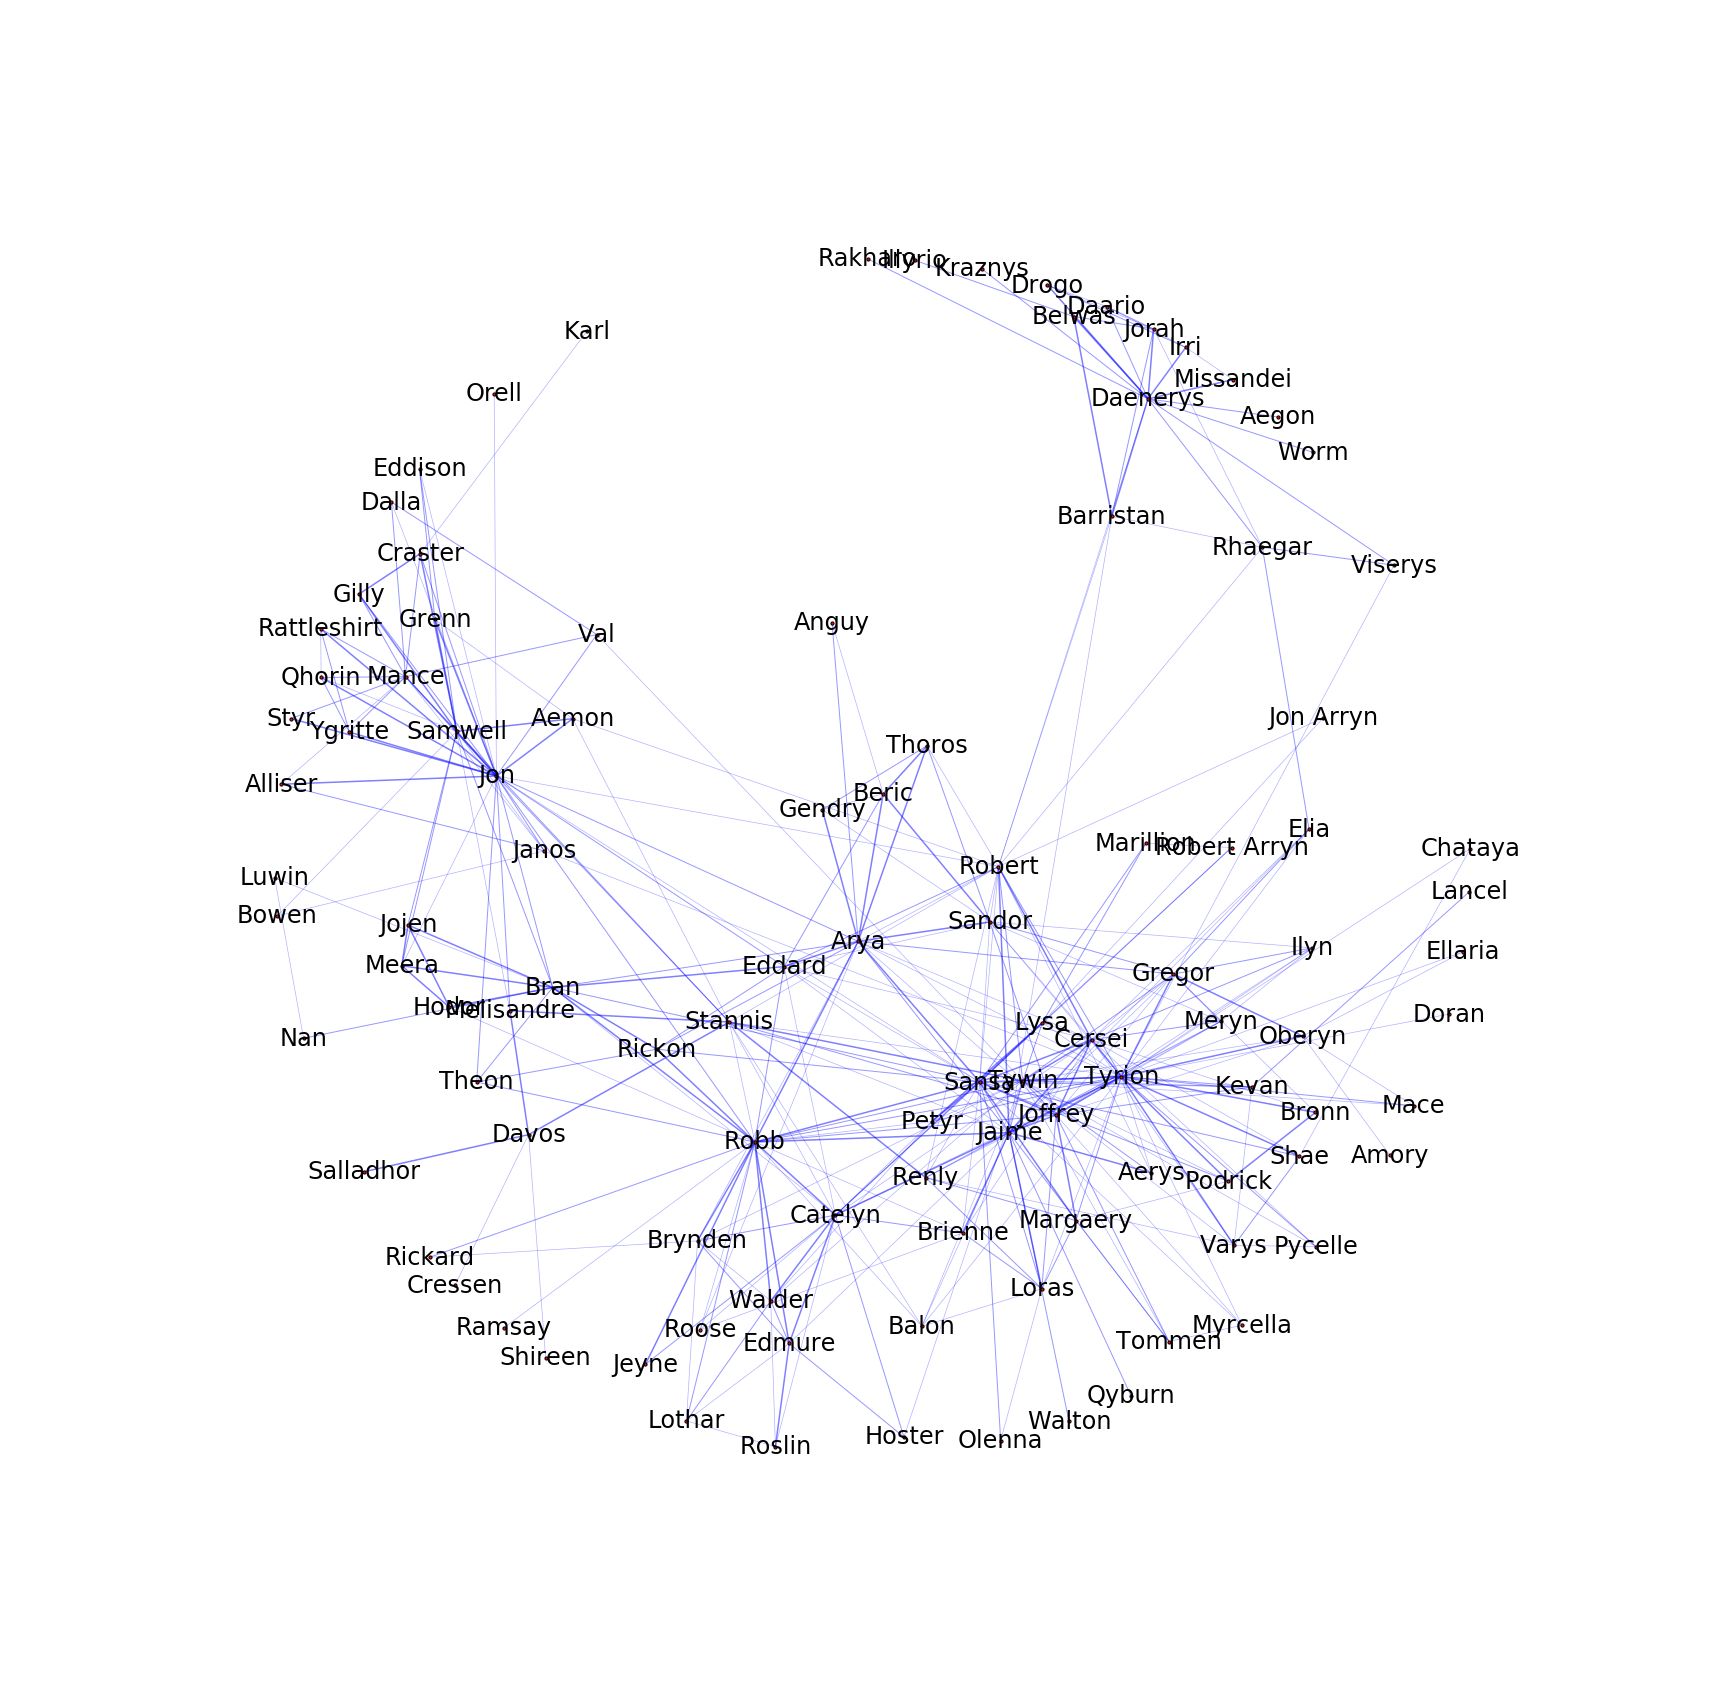

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(30,30))

#edge size given weights
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <7]
emed=[(u,v) for (u,v,d) in G.edges(data=True) if 7 <= d['weight'] <=14]
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >14]

# positions algorithm for nodes
pos=nx.spring_layout(G, k = .2, iterations = 300) 

# nodes
nx.draw_networkx_nodes(G,pos,node_size=10)

# edges
nx.draw_networkx_edges(G,pos,edgelist=esmall,width = .7,alpha=0.3,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=emed, width=1,alpha=0.4,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1.5,alpha=0.5,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=24,font_family='sans-serif')

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show() # display
plt.clf() # clear

The network graph above is more for a data scientist to get an understanding of the network. With the stand-alone softwares [Gephi](https://gephi.org/) or [Cytoscape](http://www.cytoscape.org/?gclid=Cj0KEQjwvOC5BRCb_8yNmZ_ls9IBEiQACTz8vnYqF2aHehk-myQLPzfQTAwYtqqQ5zzn-_NeQUkvkpgaAkAQ8P8HAQ), more interactive and visually pleasing plots can be made. 

The plot below was made using Gephi. 

![network_picture](https://www.macalester.edu/~abeverid/images/got-network.png)

# 5) Network Algorithms: Centrality
Now that we have a general idea of what our network looks like, and what it consists of, let's run an algorithm on the data to answer our initial question; who are the main characters?

NetworkX has a [suite of centrality algorithms](https://networkx.github.io/documentation/development/reference/algorithms.centrality.html) that can used for different interpretations of calculating how central a node is in the network.  

The most fitting centrality metric for this exercise is **Betweenness Centrality**: how often you lie on shortest paths between two other characters, making you a broker of information.


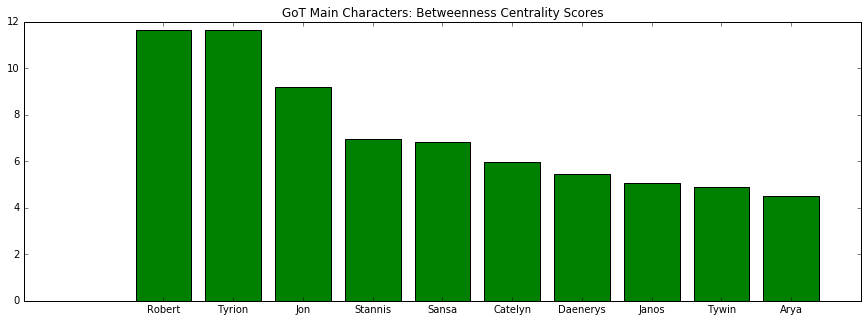

In [7]:
#calculate centrality
centrality = nx.betweenness_centrality(G, weight='weight',normalized = False, seed=10)
top_characters = sorted(centrality, key=centrality.get, reverse=True)[:10]

#plot centrality for top characters
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(figsize=(15,5))

plt.bar(range(len(top_characters)), [centrality[x] / 100 for x in top_characters], align='center', color = 'g')
plt.xticks(range(len(top_characters)), top_characters)

plt.title('GoT Main Characters: Betweenness Centrality Scores')
plt.show()

True Game of Thrones fans can argue who the main characters of the book are but from our data, we can see that Robert and Tyrion are the main two characters, with Jon following close behind. After these three, it seems to tail off.

# 6) Summary
1) Network analysis is a distinct lense from which to view data analysis
    
    Some unconventional Network Analysis use-cases:
      1) Customer purchase recommendations
      2) Employee career-path prediction
      3) Tracking migratory patterns of birds
        
2) NetworkX has a large tool-box for answering many different questions, but lacks visualization capabilties 

3) Python + NetworkX are powerful and easy-to-use tools for analyzing networks


# 7) Next Steps
Continue to play around in NetworkX with the GoT data. Try different centrality metrics and other functions like clustering or clique structure. NetworkX functions are very well documented [here](https://networkx.github.io/documentation/networkx-1.9.1/index.html). **Learning about algorithms by example in NetworkX is very effective!**


Also check out [Graph-Tool](https://graph-tool.skewed.de/) for faster algorithms, and [Cytoscape](http://www.cytoscape.org/) and/or [Gephi](https://gephi.org/) for stand-out network visualizations!